# Project: Yelp Rating Regression Predictor




## Loading the Data

To get a better understanding of the dataset we can use Pandas to explore the data in DataFrame form

In [7]:
import pandas as pd

businesses = pd.read_json('yelp_business.json', lines=True)
reviews = pd.read_json('yelp_review.json', lines=True)
users = pd.read_json('yelp_user.json', lines=True)
checkins = pd.read_json('yelp_checkin.json', lines=True)
tips = pd.read_json('yelp_tip.json', lines=True)
photos = pd.read_json('yelp_photo.json', lines=True)

## Adjusting the number of columns shown(max_columns) and number of characters shown in a column(max_colwidth) with the below code: 

In [5]:
pd.options.display.max_columns = 60
pd.options.display.max_colwidth = 500

In [8]:
businesses.head()

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1
1,,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}', 'Caters': 'True', 'DogsAllowed': 'True', 'DriveThru': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfast': False, 'brunch': False}', 'HasTV': 'False', 'OutdoorSeating': 'True', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery'...",AjEbIBw6ZFfln7ePHha9PA,"Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services",Henderson,1,0,0,"{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0', 'Sunday': '17:0-23:0'}",0,35.960734,-114.939821,CK'S BBQ & Catering,,89002,2,3,4.5,NV,0,1
2,1335 rue Beaubien E,1,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'romantic': False, 'intimate': False, 'classy': False, 'hipster': False, 'touristy': False, 'trendy': False, 'upscale': False, 'casual': False}', 'BikeParking': 'True', 'BusinessAcceptsCreditCards': 'False', 'BusinessParking': '{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}', 'Caters': 'False', 'GoodForKids': 'True', 'GoodForMeal': '{'dessert': False, 'latenight': False, 'lunch': False, 'dinner': False, 'breakfa...",O8S5hYJ1SMc8fA4QBtVujA,"Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes",Montréal,1,1,1,"{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0', 'Wednesday': '10:0-22:0', 'Thursday': '10:0-22:0', 'Friday': '10:0-22:0', 'Saturday': '10:0-22:0', 'Sunday': '10:0-22:0'}",0,45.540503,-73.599300,La Bastringue,Rosemont-La Petite-Patrie,H2G 1K7,2,5,4.0,QC,1,0
3,211 W Monroe St,0,None,bFzdJJ3wp3PZssNEsyU23g,"Insurance, Financial Services",Phoenix,0,0,0,None,1,33.449999,-112.076979,Geico Insurance,,85003,0,8,1.5,AZ,0,0
4,2005 Alyth Place SE,0,{'BusinessAcceptsCreditCards': 'True'},8USyCYqpScwiNEb58Bt6CA,"Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair",Calgary,0,0,0,"{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', 'Wednesday': '8:0-17:0', 'Thursday': '8:0-17:0', 'Friday': '8:0-17:0'}",1,51.035591,-114.027366,Action Engine,,T2H 0N5,0,4,2.0,AB,0,1


In [9]:
reviews.head()

,business_id,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes
0,--1UhMGODdWsrMastO9DZw,524.458333,466.208333,0.808638,1,16,15
1,--6MefnULPED_I942VcFNA,1199.589744,785.205128,0.669126,27,32,53
2,--7zmmkVg-IMGaXbuVd0SQ,717.851852,536.592593,0.820837,29,52,81
3,--8LPVSo5i0Oo61X01sV9A,751.750000,478.250000,0.170925,0,0,9
4,--9QQLMTbFzLJ_oT-ON3Xw,978.727273,436.181818,0.562264,3,4,7


In [10]:
users.head()

,business_id,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
0,--1UhMGODdWsrMastO9DZw,18.791667,1789.750000,1.833333,57.541667,0.833333
1,--6MefnULPED_I942VcFNA,214.564103,2039.948718,49.256410,332.743590,1.769231
2,--7zmmkVg-IMGaXbuVd0SQ,126.185185,1992.796296,19.222222,208.962963,1.814815
3,--8LPVSo5i0Oo61X01sV9A,25.250000,2095.750000,0.500000,7.500000,0.000000
4,--9QQLMTbFzLJ_oT-ON3Xw,52.454545,1804.636364,1.000000,34.636364,0.090909


In [11]:
checkins.head()

,business_id,time,weekday_checkins,weekend_checkins
0,7KPBkxAOEtb3QeIL9PEErg,"{'Fri-0': 2, 'Sat-0': 1, 'Sun-0': 1, 'Wed-0': 2, 'Fri-1': 1, 'Sat-1': 3, 'Thu-1': 1, 'Wed-1': 1, 'Sat-2': 1, 'Sun-2': 2, 'Thu-2': 1, 'Wed-2': 1, 'Fri-3': 1, 'Sun-3': 3, 'Mon-4': 1, 'Thu-4': 1, 'Tue-4': 2, 'Wed-4': 2, 'Sun-6': 1, 'Wed-6': 1, 'Thu-7': 1, 'Fri-10': 3, 'Mon-10': 1, 'Sat-10': 3, 'Sun-10': 3, 'Tue-10': 2, 'Mon-11': 1, 'Thu-11': 1, 'Wed-11': 2, 'Mon-12': 1, 'Sat-12': 1, 'Tue-12': 1, 'Sat-13': 3, 'Thu-13': 1, 'Tue-13': 2, 'Wed-13': 3, 'Fri-14': 2, 'Mon-14': 1, 'Sat-14': 1, 'Sun-14':...",76,75
1,kREVIrSBbtqBhIYkTccQUg,"{'Mon-13': 1, 'Thu-13': 1, 'Sat-16': 1, 'Wed-17': 1, 'Sun-19': 1, 'Thu-20': 1, 'Sat-21': 1}",4,3
2,tJRDll5yqpZwehenzE2cSg,"{'Thu-0': 1, 'Mon-1': 1, 'Mon-12': 1, 'Sat-16': 1, 'Sun-22': 1, 'Fri-23': 1}",3,3
3,tZccfdl6JNw-j5BKnCTIQQ,"{'Sun-14': 1, 'Fri-18': 1, 'Mon-20': 1}",1,2
4,r1p7RAMzCV_6NPF0dNoR3g,"{'Sat-3': 1, 'Sun-18': 1, 'Sat-21': 1, 'Sat-23': 1, 'Thu-23': 1}",1,4


In [12]:
tips.head()

,business_id,average_tip_length,number_tips
0,--1UhMGODdWsrMastO9DZw,79.000000,1
1,--6MefnULPED_I942VcFNA,49.857143,14
2,--7zmmkVg-IMGaXbuVd0SQ,52.500000,10
3,--9QQLMTbFzLJ_oT-ON3Xw,136.500000,2
4,--9e1ONYQuAa-CB_Rrw7Tw,68.064935,154


In [13]:
photos.head()

,business_id,average_caption_length,number_pics
0,--1UhMGODdWsrMastO9DZw,0.000000,1
1,--6MefnULPED_I942VcFNA,67.500000,2
2,--9e1ONYQuAa-CB_Rrw7Tw,30.426471,136
3,--DaPTJW3-tB1vP-PfdTEg,0.000000,1
4,--FBCX-N37CMYDfs790Bnw,5.500000,4


In [15]:
print(len(businesses))

188593


In [16]:
users.describe()

,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite
count,188593.000000,188593.000000,188593.000000,188593.000000,188593.000000
mean,105.132000,2005.367009,11.590148,122.110660,0.923313
std,162.653680,554.174540,25.901801,208.814471,1.109289
min,1.000000,76.000000,0.000000,0.666667,0.000000
25%,26.666667,1647.000000,0.666667,21.000000,0.000000
50%,59.384615,1957.150000,3.583333,62.142857,0.583333
75%,117.666667,2312.238095,11.555556,143.454545,1.400000
max,4219.000000,4860.000000,1174.666667,6335.000000,10.666667


## Merging the data

As the data is present in several files, we need to combine the data into a single DataFrame

This will allow us to analyze the different features with respect to our target variable, the Yelp rating.

As we have 6 DataFrames, we will ned to perform 5 merges to combine all the data into 1 DataFrame.

In [17]:
df = pd.merge(businesses, reviews, how='left', on='business_id')
print(len(df))

188593


In [18]:
df = pd.merge(df, users, how='left', on='business_id')
df = pd.merge(df, checkins, how='left', on='business_id')
df = pd.merge(df, tips, how='left', on='business_id')
df = pd.merge(df, photos, how='left', on='business_id')
print(len(df))

188593


In [19]:
df.head(1)

,address,alcohol?,attributes,business_id,categories,city,good_for_kids,has_bike_parking,has_wifi,hours,is_open,latitude,longitude,name,neighborhood,postal_code,price_range,review_count,stars,state,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,time,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
0,1314 44 Avenue NE,0,"{'BikeParking': 'False', 'BusinessAcceptsCreditCards': 'True', 'BusinessParking': '{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}', 'GoodForKids': 'True', 'HasTV': 'True', 'NoiseLevel': 'average', 'OutdoorSeating': 'False', 'RestaurantsAttire': 'casual', 'RestaurantsDelivery': 'False', 'RestaurantsGoodForGroups': 'True', 'RestaurantsPriceRange2': '2', 'RestaurantsReservations': 'True', 'RestaurantsTakeOut': 'True'}",Apn5Q_b6Nz61Tq4XzPdf9A,"Tours, Breweries, Pizza, Restaurants, Food, Hotels & Travel",Calgary,1,0,0,"{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0', 'Wednesday': '11:0-21:0', 'Thursday': '11:0-21:0', 'Friday': '11:0-21:0', 'Saturday': '11:0-21:0'}",1,51.091813,-114.031675,Minhas Micro Brewery,,T2E 6L6,2,24,4.0,AB,1,1,618.25,532.916667,0.865342,6,5,13,42.833333,1809.375,5.375,114.875,1.125,"{'Fri-0': 1, 'Sun-0': 3, 'Thu-0': 1, 'Fri-1': 1, 'Fri-16': 1, 'Tue-17': 1, 'Sat-18': 1, 'Tue-18': 2, 'Wed-18': 1, 'Fri-19': 2, 'Thu-19': 2, 'Sat-20': 3, 'Thu-20': 1, 'Tue-20': 1, 'Sat-21': 2, 'Tue-21': 1, 'Fri-22': 1, 'Sat-22': 1, 'Thu-22': 1, 'Fri-23': 1, 'Sat-23': 1}",11.0,18.0,38.0,6.0,NaN,NaN


## Cleaning the Data 

As we are using Linear Regression model, our features will ideally be continuous variables that have an affect on our dependent variable, the Yelp rating.

In this project, as we are working with features which are binary, on the scale[0,1], we can remove any columns that are not continuous or binary, and that we do not want to make predictions on.

In [20]:
features_to_remove = ['address','attributes','business_id','categories','city','hours','is_open','latitude','longitude','name','neighborhood','postal_code','state','time']
df.drop(features_to_remove, axis=1, inplace=True)

Check for any missing values or Nan s

In [21]:
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins               True
weekend_checkins               True
average_tip_length             True
number_tips                    True
average_caption_length         True
number_pics                    True
dtype: bool

Filling the missing values with 0

In [27]:
df.fillna({'weekday_checkins':0, 'weekend_checkins':0, 'average_tip_length':0, 'number_tips':0, 'average_caption_length':0, 'number_pics':0}, inplace=True)
df.isna().any()

alcohol?                      False
good_for_kids                 False
has_bike_parking              False
has_wifi                      False
price_range                   False
review_count                  False
stars                         False
take_reservations             False
takes_credit_cards            False
average_review_age            False
average_review_length         False
average_review_sentiment      False
number_funny_votes            False
number_cool_votes             False
number_useful_votes           False
average_number_friends        False
average_days_on_yelp          False
average_number_fans           False
average_review_count          False
average_number_years_elite    False
weekday_checkins              False
weekend_checkins              False
average_tip_length            False
number_tips                   False
average_caption_length        False
number_pics                   False
dtype: bool

## EDA 

Now let's see some of the different features to see what might correlate most with our dependent variable, the Yelp rating('stars').

In [28]:
df.corr()

,alcohol?,good_for_kids,has_bike_parking,has_wifi,price_range,review_count,stars,take_reservations,takes_credit_cards,average_review_age,average_review_length,average_review_sentiment,number_funny_votes,number_cool_votes,number_useful_votes,average_number_friends,average_days_on_yelp,average_number_fans,average_review_count,average_number_years_elite,weekday_checkins,weekend_checkins,average_tip_length,number_tips,average_caption_length,number_pics
alcohol?,1.000000,0.305284,0.213318,0.345032,0.349004,0.259836,-0.043332,0.601670,0.190738,0.139108,0.037369,0.097188,0.117472,0.188598,0.165775,0.015261,0.129901,0.017794,0.026846,0.099141,0.094398,0.131175,0.098037,0.208856,0.305570,0.252523
good_for_kids,0.305284,1.000000,0.271788,0.258887,0.205513,0.162469,-0.030382,0.318729,0.150360,0.055847,-0.079183,0.073806,0.060658,0.113262,0.083832,0.016557,0.045057,0.024901,0.040692,0.094233,0.068960,0.079808,0.121948,0.156536,0.291413,0.175058
has_bike_parking,0.213318,0.271788,1.000000,0.235138,0.416044,0.155505,0.068084,0.160129,0.286298,-0.080443,-0.116295,0.130448,0.060595,0.114094,0.094000,0.028307,-0.045849,0.018120,0.031203,0.083062,0.082474,0.093579,0.144163,0.147115,0.180468,0.109552
has_wifi,0.345032,0.258887,0.235138,1.000000,0.240796,0.195737,-0.039857,0.312217,0.155098,-0.034258,-0.037712,0.054699,0.082213,0.147320,0.120622,0.015937,0.000448,0.023913,0.044006,0.082863,0.107467,0.126861,0.104742,0.173542,0.258938,0.210583
price_range,0.349004,0.205513,0.416044,0.240796,1.000000,0.148277,-0.052565,0.316105,0.400742,0.189623,0.003850,0.089349,0.073215,0.119422,0.098990,0.087231,0.176133,0.104221,0.122982,0.210487,0.057877,0.081321,0.129212,0.119632,0.170171,0.143570
review_count,0.259836,0.162469,0.155505,0.195737,0.148277,1.000000,0.032413,0.187755,0.119984,0.010070,0.004748,0.076265,0.548164,0.860767,0.746949,0.026206,0.050451,0.000474,-0.002576,0.014712,0.567452,0.699631,0.094133,0.844978,0.224983,0.610889
stars,-0.043332,-0.030382,0.068084,-0.039857,-0.052565,0.032413,1.000000,-0.024486,0.037748,-0.125645,-0.277081,0.782187,0.001320,0.043375,-0.000066,-0.007629,-0.038061,-0.031141,-0.066572,-0.064419,0.004130,0.007863,-0.052899,0.014038,0.000040,0.001727
take_reservations,0.601670,0.318729,0.160129,0.312217,0.316105,0.187755,-0.024486,1.000000,0.127941,0.064098,0.046331,0.086728,0.071131,0.129165,0.115583,-0.025522,0.048850,0.001131,0.010618,0.063990,0.053162,0.076183,0.084098,0.134832,0.282823,0.231242
takes_credit_cards,0.190738,0.150360,0.286298,0.155098,0.400742,0.119984,0.037748,0.127941,1.000000,0.056399,-0.081383,0.084171,0.049945,0.079879,0.077804,0.027924,0.078443,-0.007124,-0.005260,0.009551,0.047402,0.055898,0.119925,0.097700,0.103271,0.073276
average_review_age,0.139108,0.055847,-0.080443,-0.034258,0.189623,0.010070,-0.125645,0.064098,0.056399,1.000000,0.192355,0.003662,0.032199,0.031577,0.028122,0.218990,0.820888,0.243377,0.261623,0.377335,0.030324,0.035531,-0.000525,0.050846,-0.024121,-0.041140


Let's plot the three features (average_review_sentiment, average_review_length, average_review_age) against 'stars', our Yelp rating.

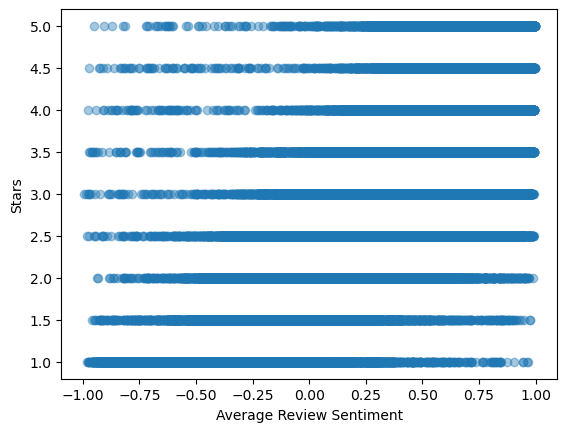

In [31]:
from matplotlib import pyplot as plt

plt.scatter(df['average_review_sentiment'], df['stars'], alpha=0.4)
plt.xlabel('Average Review Sentiment')
plt.ylabel('Stars')
plt.show()

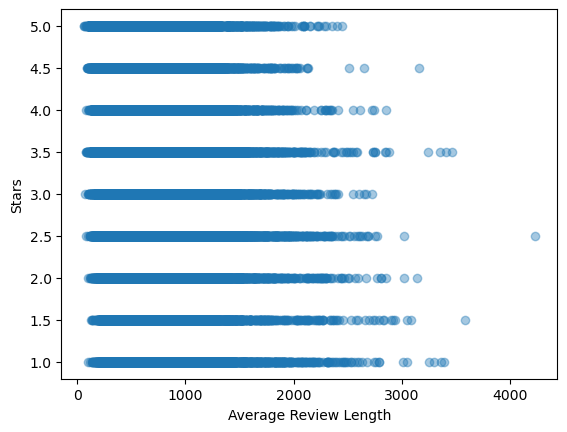

In [34]:
plt.scatter(df['average_review_length'], df['stars'], alpha=0.4)
plt.xlabel('Average Review Length')
plt.ylabel('Stars')
plt.show()

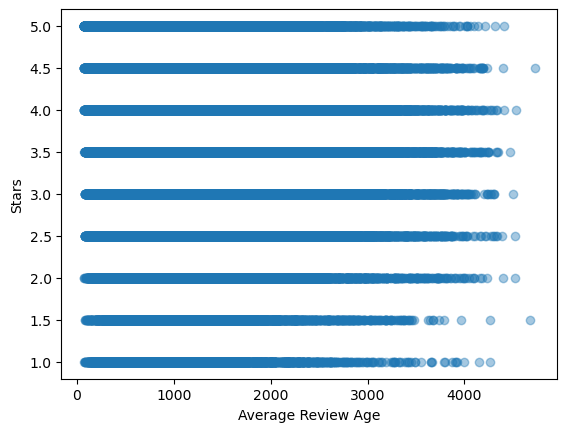

In [35]:
plt.scatter(df['average_review_age'], df['stars'], alpha=0.4)
plt.xlabel('Average Review Age')
plt.ylabel('Stars')
plt.show()

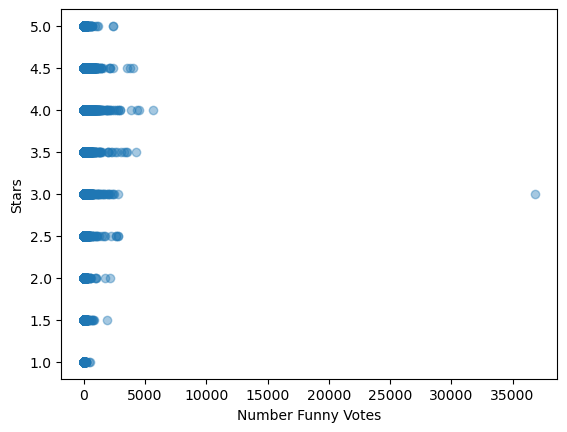

In [36]:
plt.scatter(df['number_funny_votes'], df['stars'], alpha=0.4)
plt.xlabel('Number Funny Votes')
plt.ylabel('Stars')
plt.show()

In order to put our data into a Linear Regression model, we need to separate out our features to model on and the Yelp ratings

From our correlation analysis we saw that the 3 features with the strongest correlations to Yelp rating are average_review_sentiment, average_review_length, and average_review_age.

Since average_review_sentiment had a very high correlation with Yelp rating, we'll dig a little deeper into it later.

Lets create our first model with average_review_length and average_review_age as features

In [38]:
features = df[['average_review_length', 'average_review_age']]
ratings = df['stars']

## Spliting the Data into Training and Testing Sets 

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features,ratings, train_size=0.8, test_size=0.2, random_state=1)

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluating and Understanding the model 

In [42]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.08250309566544889
0.08083081210060561


In [45]:
sorted(list(zip(['average_review_length', 'avereage_review_age'], model.coef_)), key=lambda x: abs(x[1]) ,reverse=True)

[('average_review_length', -0.000997717685207456),
 ('avereage_review_age', -0.0001162162683636645)]

Now we can calculate the predicted Yelp ratings(y_predicted) for our testing data(X_test) and compare them to their actual Yelp ratings (y_test).

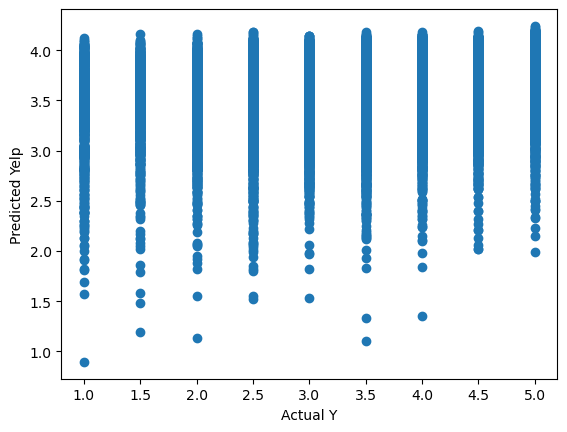

In [47]:
y_predicted = model.predict(X_test)

plt.scatter(y_test, y_predicted)
plt.xlabel('Actual Y')
plt.ylabel('Predicted Yelp')
plt.show()

After evaluating the first model, we can see that 'average_review_length' and 'average_review_age' alone are not best predictors for Yelp rating.

So. lets do some more modeling with different subsets of features and see if we can achieve more accurate model.

we will create different subsets of features we can model upon.

In [63]:
sentiment = ['average_review_sentiment']

In [49]:
binary_features = ['alcohol?','has_bike_parking','takes_credit_cards','good_for_kids','take_reservations','has_wifi']

In [50]:
numeric_features = ['review_count','price_range','average_caption_length','number_pics','average_review_age','average_review_length','average_review_sentiment','number_funny_votes','number_cool_votes','number_useful_votes','average_tip_length','number_tips','average_number_friends','average_days_on_yelp','average_number_fans','average_review_count','average_number_years_elite','weekday_checkins','weekend_checkins']

In [51]:
all_features = binary_features + numeric_features

## Further Modeling 

In [69]:
import numpy as np

def model_these_features(feature_list):
    ratings = df['stars']
    features = df[feature_list]
    
    X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state = 1)
    
    if len(X_train.shape)<2:
        X_train = np.array(X_train).reshape(-1,1)
        X_test = np.array(X_test).reshape(-1,1)
        
    model = LinearRegression()
    model.fit(X_train, y_train)
        
    print('Train Score:', model.score(X_train, y_train))
    print('Test Score:', model.score(X_test, y_test))
        
    print(sorted(list(zip(feature_list, model.coef_)), key=lambda x: abs(x[1]), reverse=True))
        
    y_predicted = model.predict(X_test)
        
    plt.scatter(y_test, y_predicted)
    plt.xlabel('Yelp Rating')
    plt.ylabel('Actual Yelp Rating')
    plt.ylim(1,5)
    plt.show()

Train Score: 0.6118980950438655
Test Score: 0.6114021046919492
[('average_review_sentiment', 2.303390843374966)]


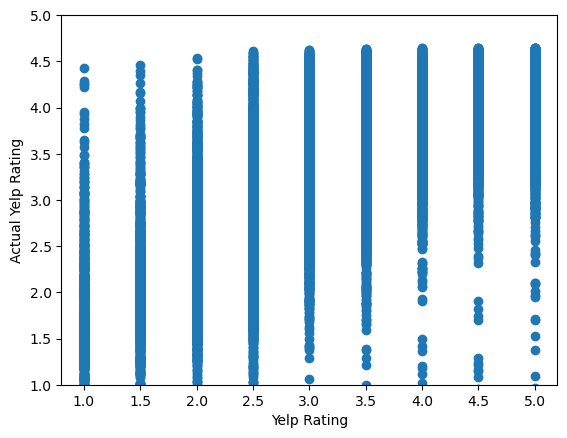

In [70]:
model_these_features(sentiment)

Train Score: 0.012223180709591164
Test Score: 0.010119542202269072
[('has_bike_parking', 0.19003008208040764), ('alcohol?', -0.14549670708137835), ('has_wifi', -0.13187397577762172), ('good_for_kids', -0.08632485990337849), ('takes_credit_cards', 0.0717553649219558), ('take_reservations', 0.045265585304515694)]


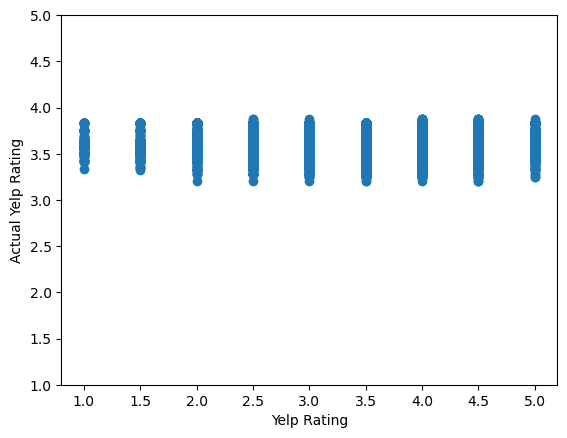

In [71]:
model_these_features(binary_features)

Train Score: 0.6734992593766658
Test Score: 0.6713318798120158
[('average_review_sentiment', 2.2721076642094897), ('price_range', -0.08046080962697907), ('average_number_years_elite', -0.0719036628805429), ('average_caption_length', -0.003347066007784876), ('number_pics', -0.0029565028128919263), ('number_tips', -0.0015953050789033118), ('number_cool_votes', 0.001146883922707117), ('average_number_fans', 0.0010510602097463942), ('average_review_length', -0.0005813655692093333), ('average_tip_length', -0.000532203206345806), ('number_useful_votes', -0.00023203784758736579), ('average_review_count', -0.00022431702895035695), ('average_review_age', -0.00016930608165062347), ('average_days_on_yelp', 0.0001287802587668042), ('weekday_checkins', 5.91858075447288e-05), ('weekend_checkins', -5.5181762069853035e-05), ('average_number_friends', 4.826992111579115e-05), ('review_count', -3.483483763759265e-05), ('number_funny_votes', -7.884395673254246e-06)]


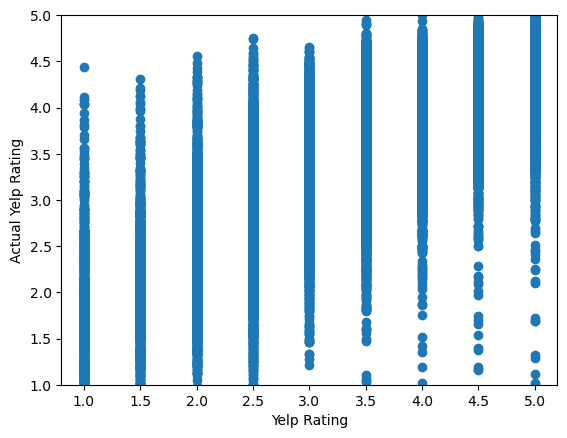

In [72]:
model_these_features(numeric_features)

Train Score: 0.6807828861895335
Test Score: 0.6782129045869247
[('average_review_sentiment', 2.280845699662372), ('alcohol?', -0.149914985934756), ('has_wifi', -0.1215538262926395), ('good_for_kids', -0.11807814422008919), ('price_range', -0.06486730150042011), ('average_number_years_elite', -0.06278939713895318), ('has_bike_parking', 0.027296969912164074), ('takes_credit_cards', 0.02445183785365247), ('take_reservations', 0.014134559172973253), ('number_pics', -0.001313361230080694), ('average_number_fans', 0.001026798682265411), ('number_cool_votes', 0.0009723722734405931), ('number_tips', -0.0008546563320879271), ('average_caption_length', -0.0006472749798206005), ('average_review_length', -0.00058962579202727), ('average_tip_length', -0.0004205217503403316), ('number_useful_votes', -0.00027150641256149226), ('average_review_count', -0.00023398356902507196), ('average_review_age', -0.00015776544111326118), ('average_days_on_yelp', 0.00012326147662885048), ('review_count', 0.00010112

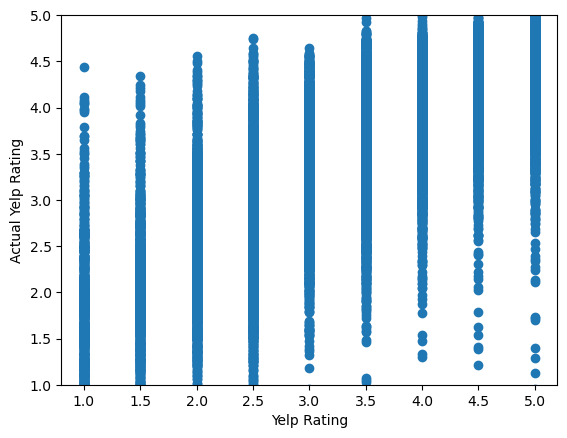

In [73]:
model_these_features(all_features)

The best model will the model with all features, so we'll retrain our model with all features

In [74]:
features = df[all_features]
ratings = df['stars']

X_train, X_test, y_train, y_test = train_test_split(features, ratings, test_size=0.2, random_state=1)

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [77]:
daniells_delicious_delicacies = np.array([0,1,1,1,1,1,10,2,3,10,10,1200,0.9,3,6,5,50,3,50,1800,12,123,0.5,0,0]).reshape(1,-1)

In [78]:
model.predict(daniells_delicious_delicacies)

C:\Users\SANATH\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([4.03799004])

So, our Linear Regression Model predicts that daniells_delicious_delicacies will have a Yelp Rating of 4.03